# 1. Exploratory Analysis

In [1]:
# Pakcages
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.utils import resample

/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
file_path = './train.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head()


,id,scrape_id,last_scraped,name,description,picture_url,host_id,host_name,host_since,host_is_superhost,...,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,20230903194229,2023-09-04,Home in Torrance · 1 bedroom · 1 bed · 1 share...,"Beautifully designed decor, lighting and enter...",https://a0.muscache.com/pictures/0f019985-8295...,205539927,Leonardo,2018-07-27,f,...,363,2023-09-04,0,0,0,f,5,0,0,5
1,1,20230903194229,2023-09-04,Rental unit in Venice · ★4.74 · 2 bedrooms · 2...,The location is great - the apt is HUGH 1877 S...,https://a0.muscache.com/pictures/2d5c133d-a280...,7599550,Donald,2013-07-19,t,...,296,2023-09-04,81,24,2,f,3,3,0,0
2,2,20230903194229,2023-09-04,Home in Avalon · ★5.0 · 3 bedrooms · 4 beds · ...,"315 Eucalyptus Lower<br />Spacious, Remodeled ...",https://a0.muscache.com/pictures/prohost-api/H...,271118401,Catalina Vacations,2019-06-24,f,...,201,2023-09-04,3,2,0,t,113,113,0,0
3,3,20230903194229,2023-09-04,Home in Santa Clarita · 4 bedrooms · 5 beds · ...,Close to almost everything when you stay at th...,https://a0.muscache.com/pictures/miso/Hosting-...,429951162,Kellie,2021-11-01,f,...,364,2023-09-04,0,0,0,f,3,3,0,0
4,4,20230903194229,2023-09-04,Hotel in Los Angeles · ★New · 1 bedroom · 1 be...,Enjoy the thrill of staying in a hotel located...,https://a0.muscache.com/pictures/prohost-api/H...,501999278,RoomPicks,2023-02-20,f,...,269,2023-09-04,0,0,0,t,80,21,59,0


In [3]:
dataset_cleaned = dataset.drop(['id','name','scrape_id','last_scraped','description',
                                'picture_url','host_name','calendar_last_scraped'],axis=1)

In [4]:
# Counting the number of amenities for each row
# Assuming amenities are separated by commas in the 'amenities' column
dataset_cleaned['number_amenities'] = dataset_cleaned['amenities'].str.split(',').apply(lambda x: len(x))

# Drop amenities
dataset_cleaned = dataset_cleaned.drop(['amenities'],axis=1)

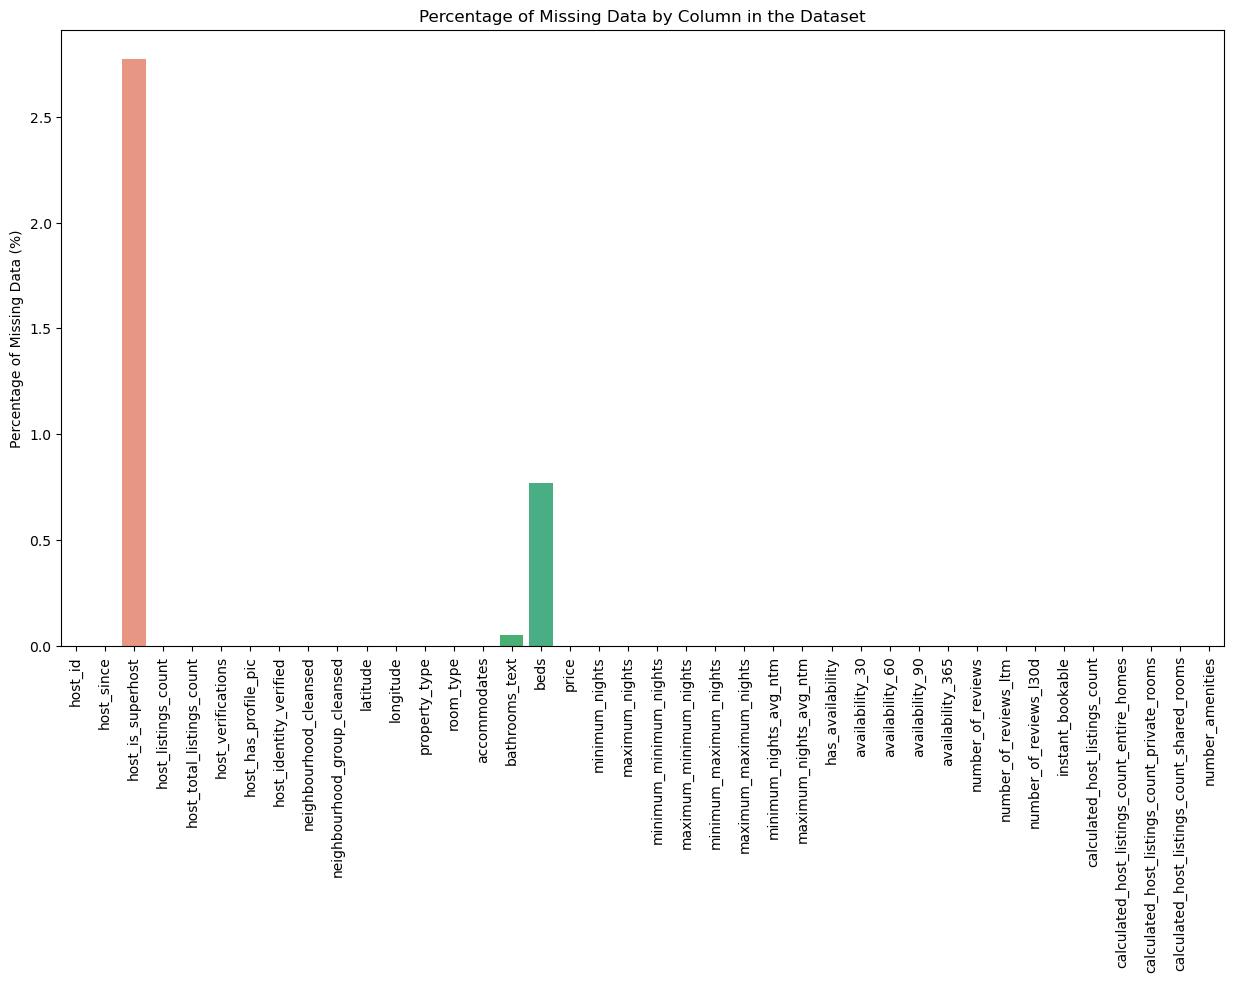

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing data in each column
missing_data = dataset_cleaned.isnull().mean() * 100

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Data (%)')
plt.title('Percentage of Missing Data by Column in the Dataset')
plt.show()


In [6]:
# Dropping off rows with missing values in 'host_is_superhost' column
dataset_cleaned = dataset_cleaned.dropna(subset=['host_is_superhost'])
# Dropping off rows with missing values in 'host_is_superhost' column
dataset_cleaned = dataset_cleaned.dropna(subset=['bathrooms_text'])
# Dropping off rows with missing values in 'host_is_superhost' column
dataset_cleaned = dataset_cleaned.dropna(subset=['beds'])

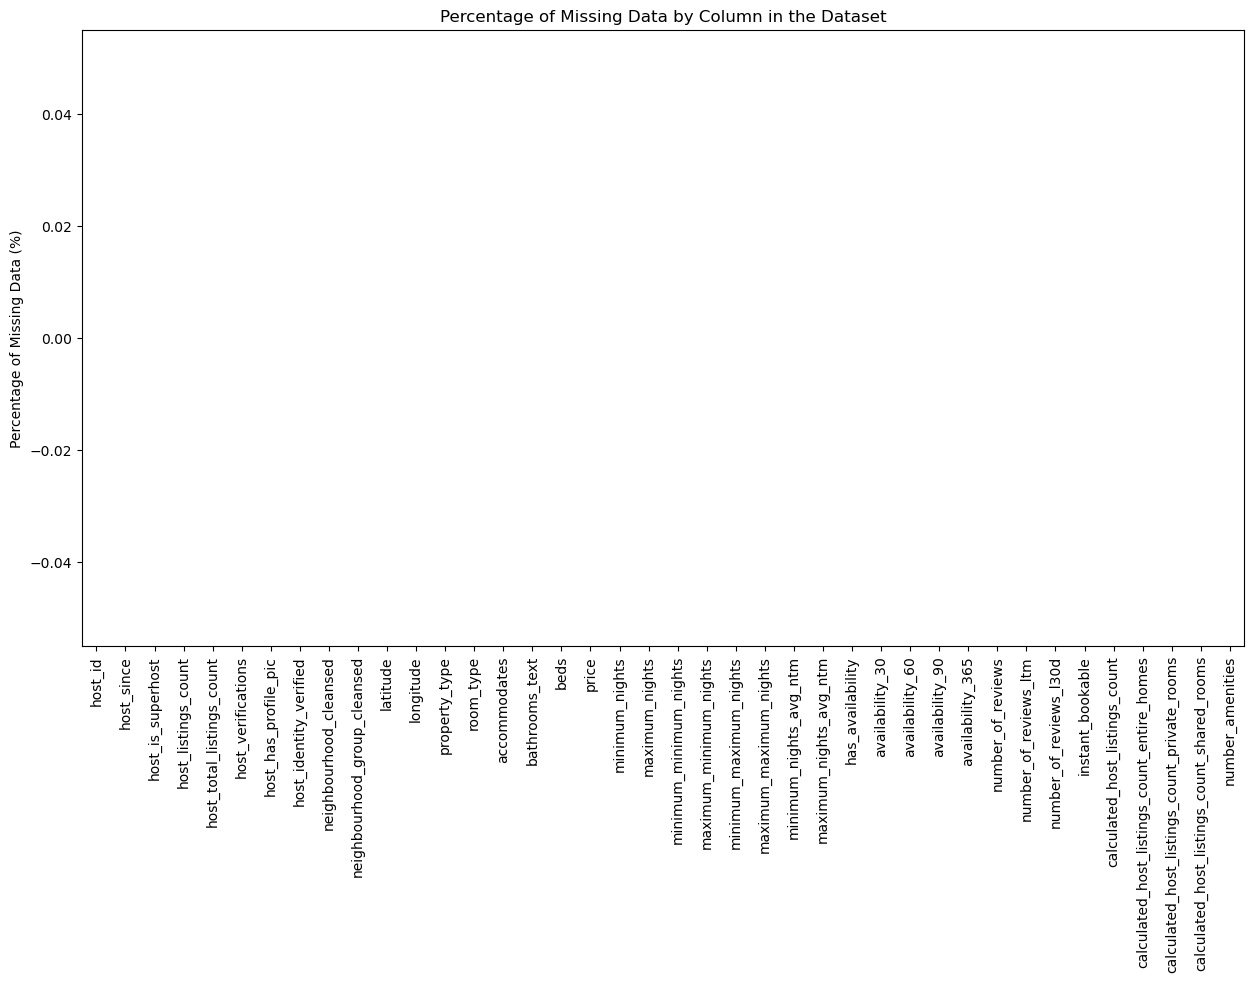

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing data in each column
missing_data = dataset_cleaned.isnull().mean() * 100

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Data (%)')
plt.title('Percentage of Missing Data by Column in the Dataset')
plt.show()

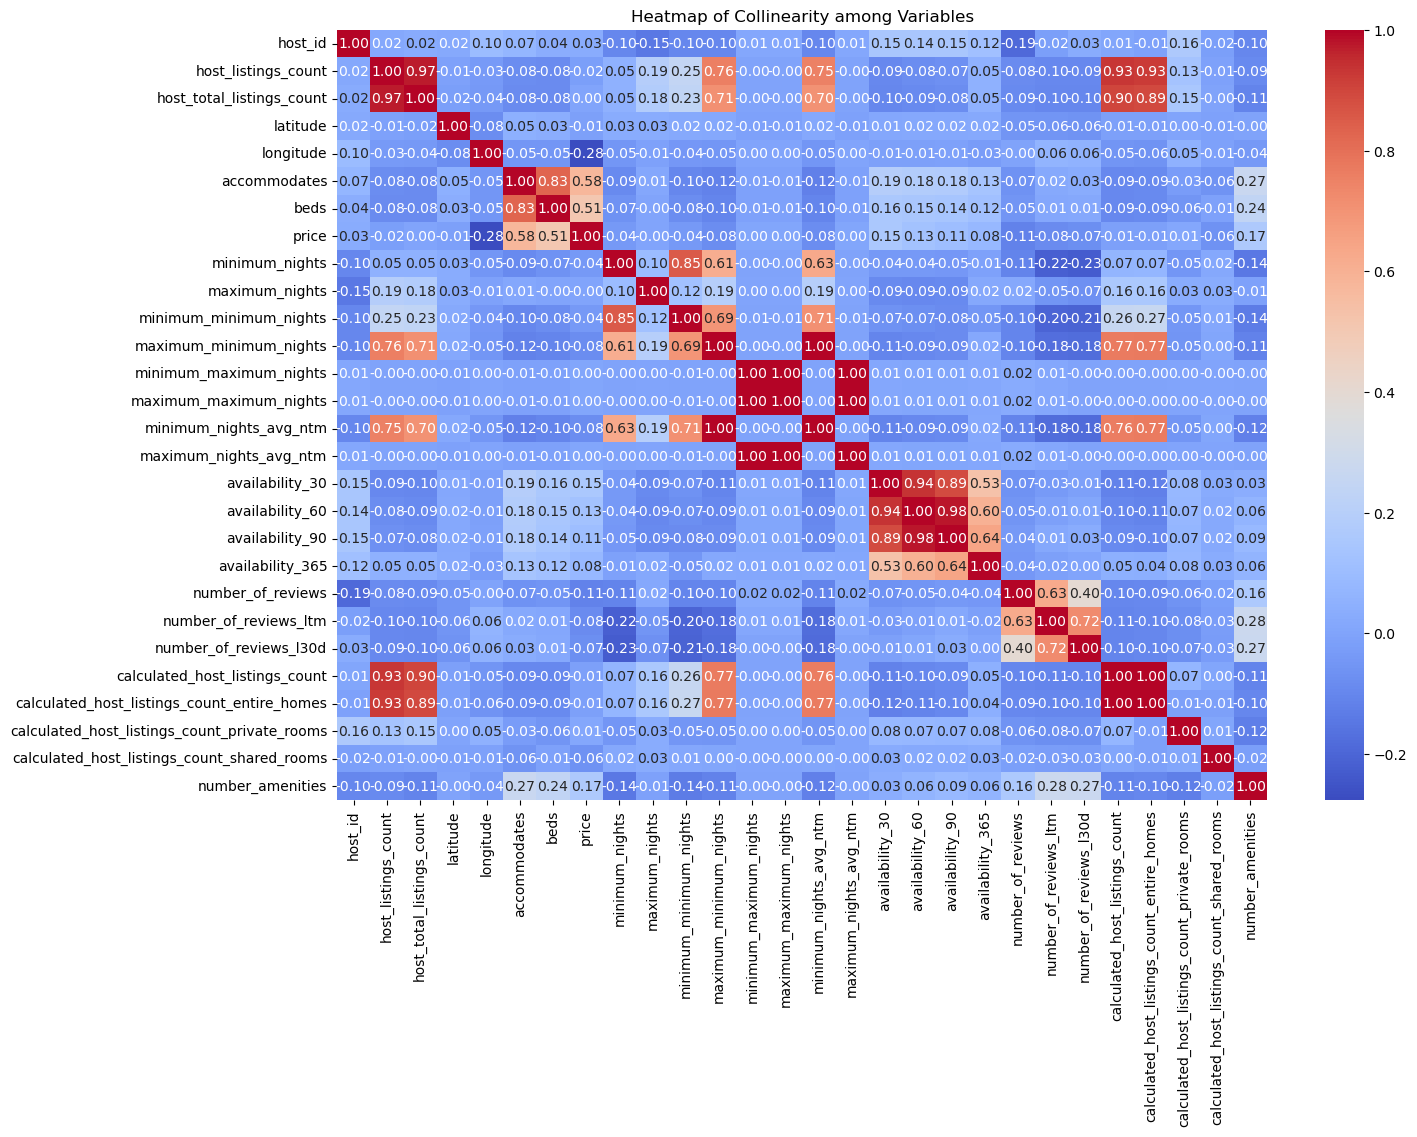

In [8]:
# Selecting columns for checking collinearity, excluding specified columns
cols_for_collinearity = dataset_cleaned.select_dtypes(include=[np.number])

# Calculating correlation matrix
corr_matrix = cols_for_collinearity.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Collinearity among Variables')
plt.show()

In [9]:
# Summary statistics for selected columns
summary_stats = dataset_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].describe()
summary_stats

,price,minimum_nights,number_of_reviews,availability_365
count,14886.000000,14886.000000,14886.000000,14886.000000
mean,1.961911,16.810359,30.773008,204.242308
std,1.622594,30.550330,67.731314,135.317802
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,82.000000
50%,2.000000,5.000000,5.000000,217.000000
75%,3.000000,30.000000,28.000000,344.000000
max,5.000000,1124.000000,1118.000000,365.000000


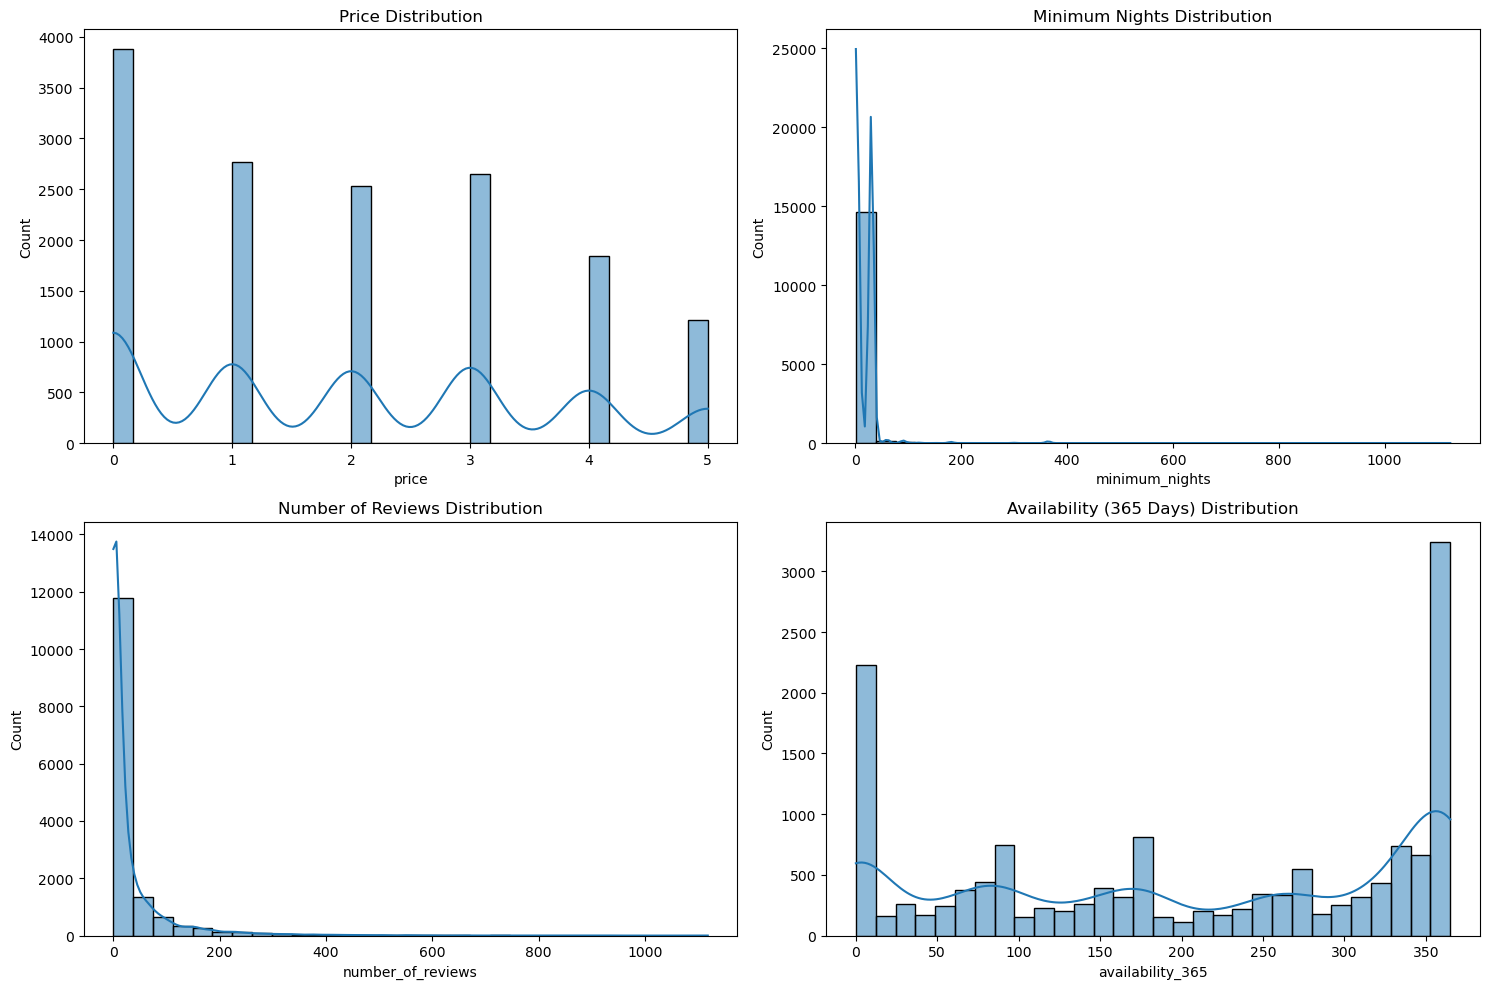

In [10]:
# Plotting histograms for these columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(dataset_cleaned['price'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Price Distribution')

sns.histplot(dataset_cleaned['minimum_nights'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Minimum Nights Distribution')

sns.histplot(dataset_cleaned['number_of_reviews'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Number of Reviews Distribution')

sns.histplot(dataset_cleaned['availability_365'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Availability (365 Days) Distribution')

plt.tight_layout()
plt.show()

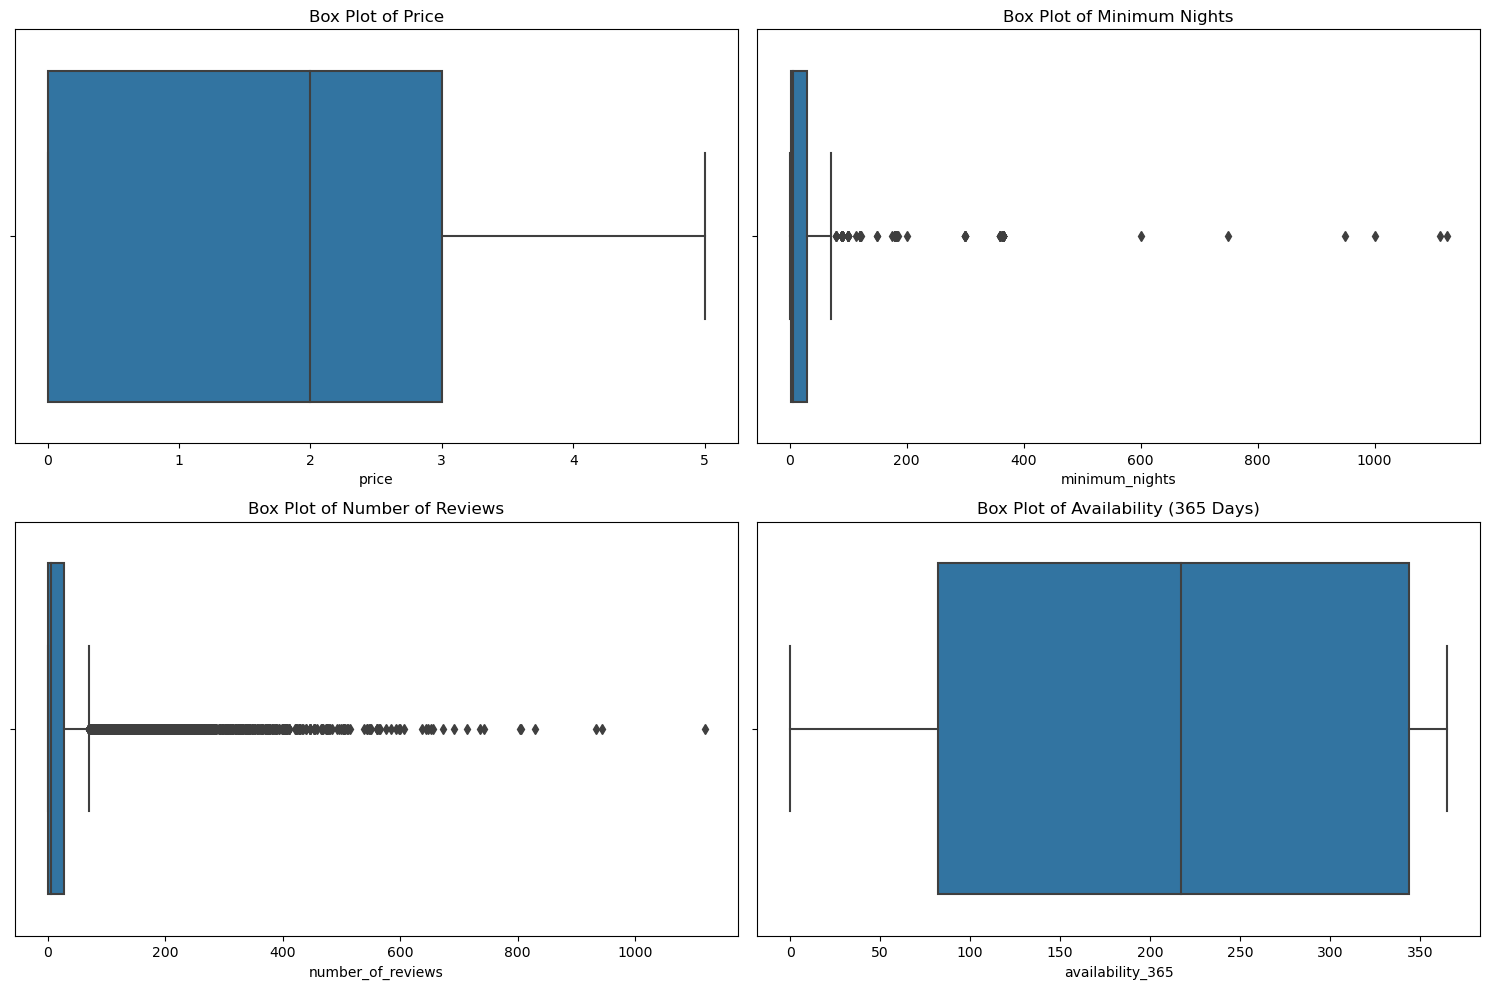

In [11]:
# Box Plots for Numerical Features
plt.figure(figsize=(15, 10))

# Box plot for 'price'
plt.subplot(2, 2, 1)
sns.boxplot(x=dataset_cleaned['price'])
plt.title('Box Plot of Price')

# Box plot for 'minimum_nights'
plt.subplot(2, 2, 2)
sns.boxplot(x=dataset_cleaned['minimum_nights'])
plt.title('Box Plot of Minimum Nights')

# Box plot for 'number_of_reviews'
plt.subplot(2, 2, 3)
sns.boxplot(x=dataset_cleaned['number_of_reviews'])
plt.title('Box Plot of Number of Reviews')

# Box plot for 'availability_365'
plt.subplot(2, 2, 4)
sns.boxplot(x=dataset_cleaned['availability_365'])
plt.title('Box Plot of Availability (365 Days)')

plt.tight_layout()
plt.show()


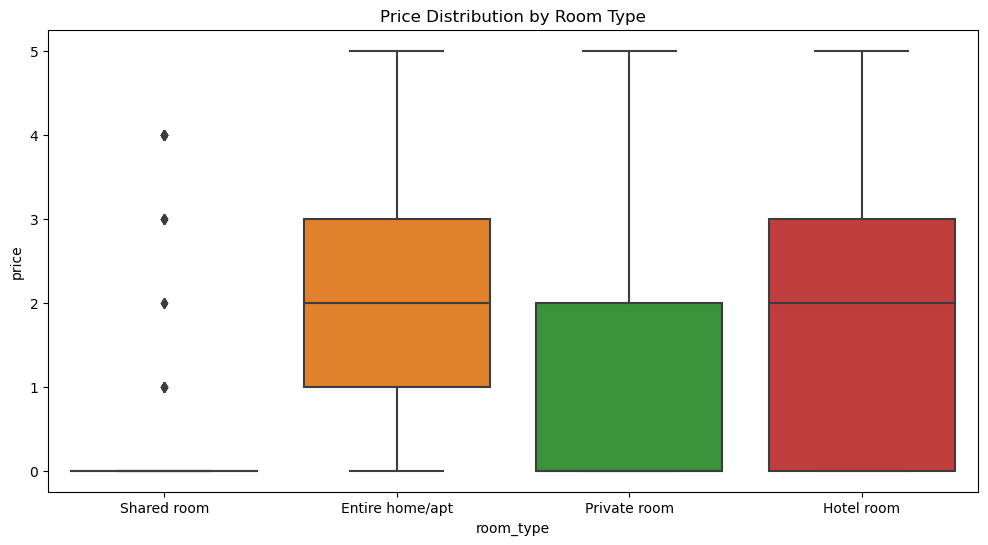

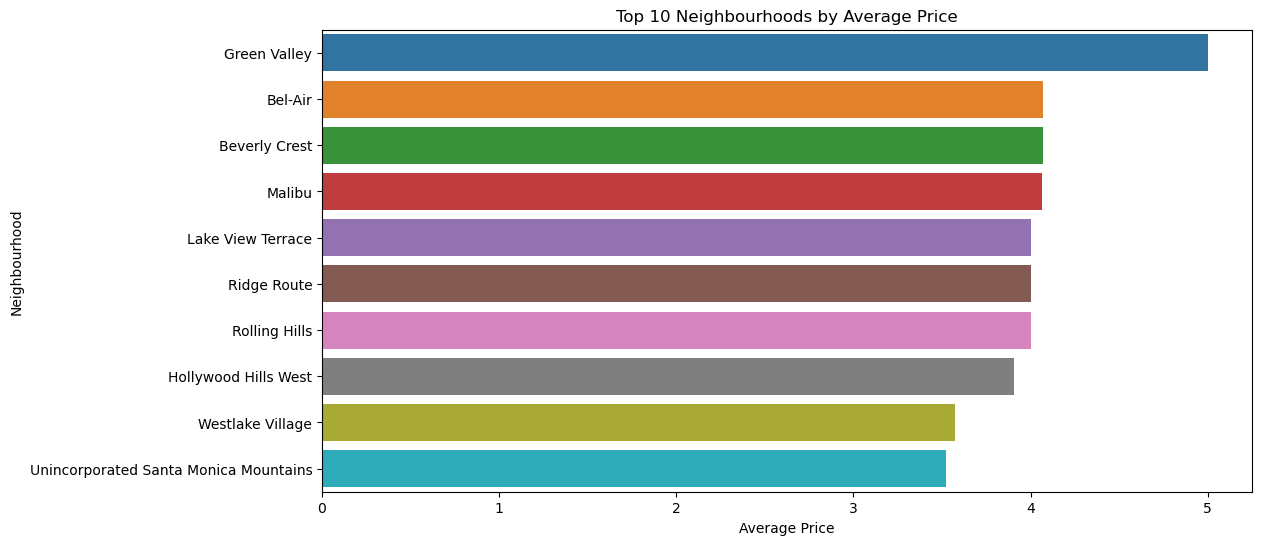

In [12]:
# Box plot for 'price' by 'room_type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=dataset_cleaned)
plt.title('Price Distribution by Room Type')
plt.show()

# Average price per 'neighbourhood_cleansed'
avg_price_neighbourhood = dataset_cleaned.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).reset_index()

# Plotting the top 10 neighbourhoods by average price
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='neighbourhood_cleansed', data=avg_price_neighbourhood.head(10))
plt.title('Top 10 Neighbourhoods by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()


# 2. Model

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [14]:
train_df = dataset_cleaned
test_df = pd.read_csv('./test.csv')

test_df = test_df.drop(['id','name','scrape_id','last_scraped','description',
                                'picture_url','host_name','calendar_last_scraped'],axis=1)
# Counting the number of amenities for each row
# Assuming amenities are separated by commas in the 'amenities' column
test_df['number_amenities'] = test_df['amenities'].str.split(',').apply(lambda x: len(x))

# Drop amenities
test_df = test_df.drop(['amenities'],axis=1)

In [15]:
# Function to encode categorical variables with handling unseen data in test set
def encode_with_unseen(train_series, test_series):
    """Encodes train and test series, handling unseen categories in test set."""
    unique_values = np.union1d(train_series.unique(), test_series.unique())
    le = LabelEncoder().fit(unique_values)
    return le.transform(train_series), le.transform(test_series)

# Encoding categorical variables
categorical_columns = train_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_df[col], test_df[col] = encode_with_unseen(train_df[col].astype(str), test_df[col].astype(str))


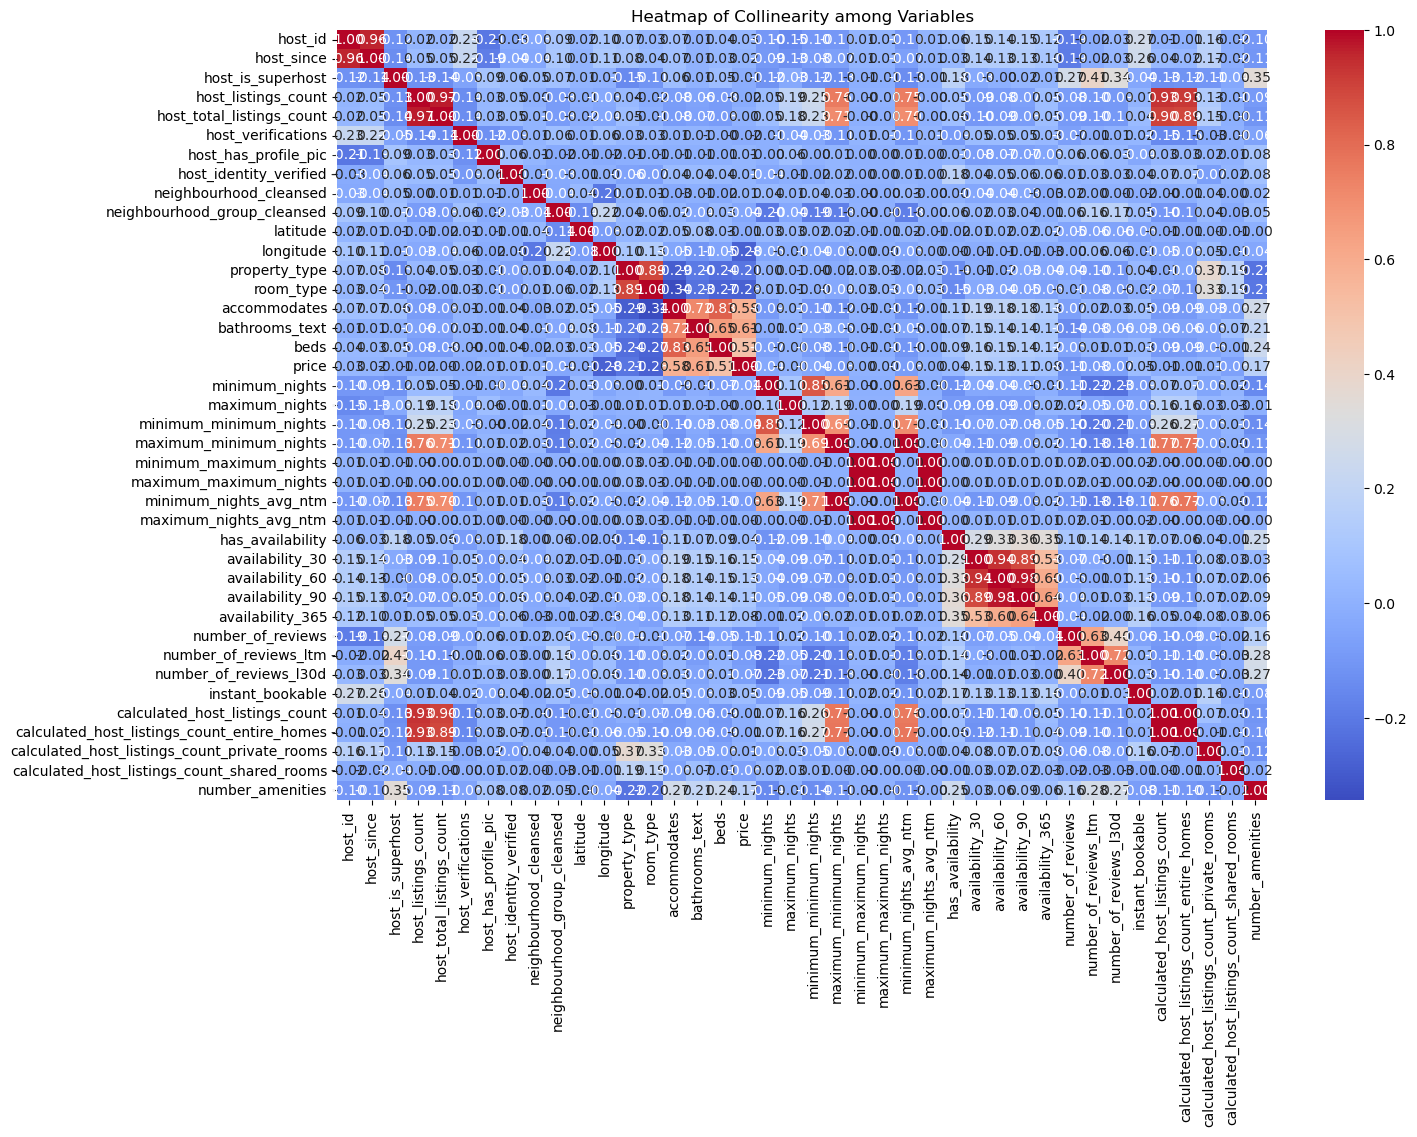

In [16]:
# Selecting columns for checking collinearity, excluding specified columns
cols_for_collinearity = train_df.select_dtypes(include=[np.number])

# Calculating correlation matrix
corr_matrix = cols_for_collinearity.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Collinearity among Variables')
plt.show()


In [17]:
def clean_dataset(dataset):
    
    columns_to_drop = ['host_since','host_listings_count','room_type',
                          'calculated_host_listings_count','maximum_maximum_nights',
                         'maximum_minimum_nights','host_total_listings_count',
                         'availability_60','availability_90','minimum_maximum_nights']
    
    # Drop the columns if they exist in the dataset
    dataset_cleaned = dataset.drop(columns=[col for col in columns_to_drop if col in dataset.columns], axis=1)
    
    return dataset_cleaned

In [18]:
train_df = clean_dataset(train_df)
test_df = clean_dataset(test_df)

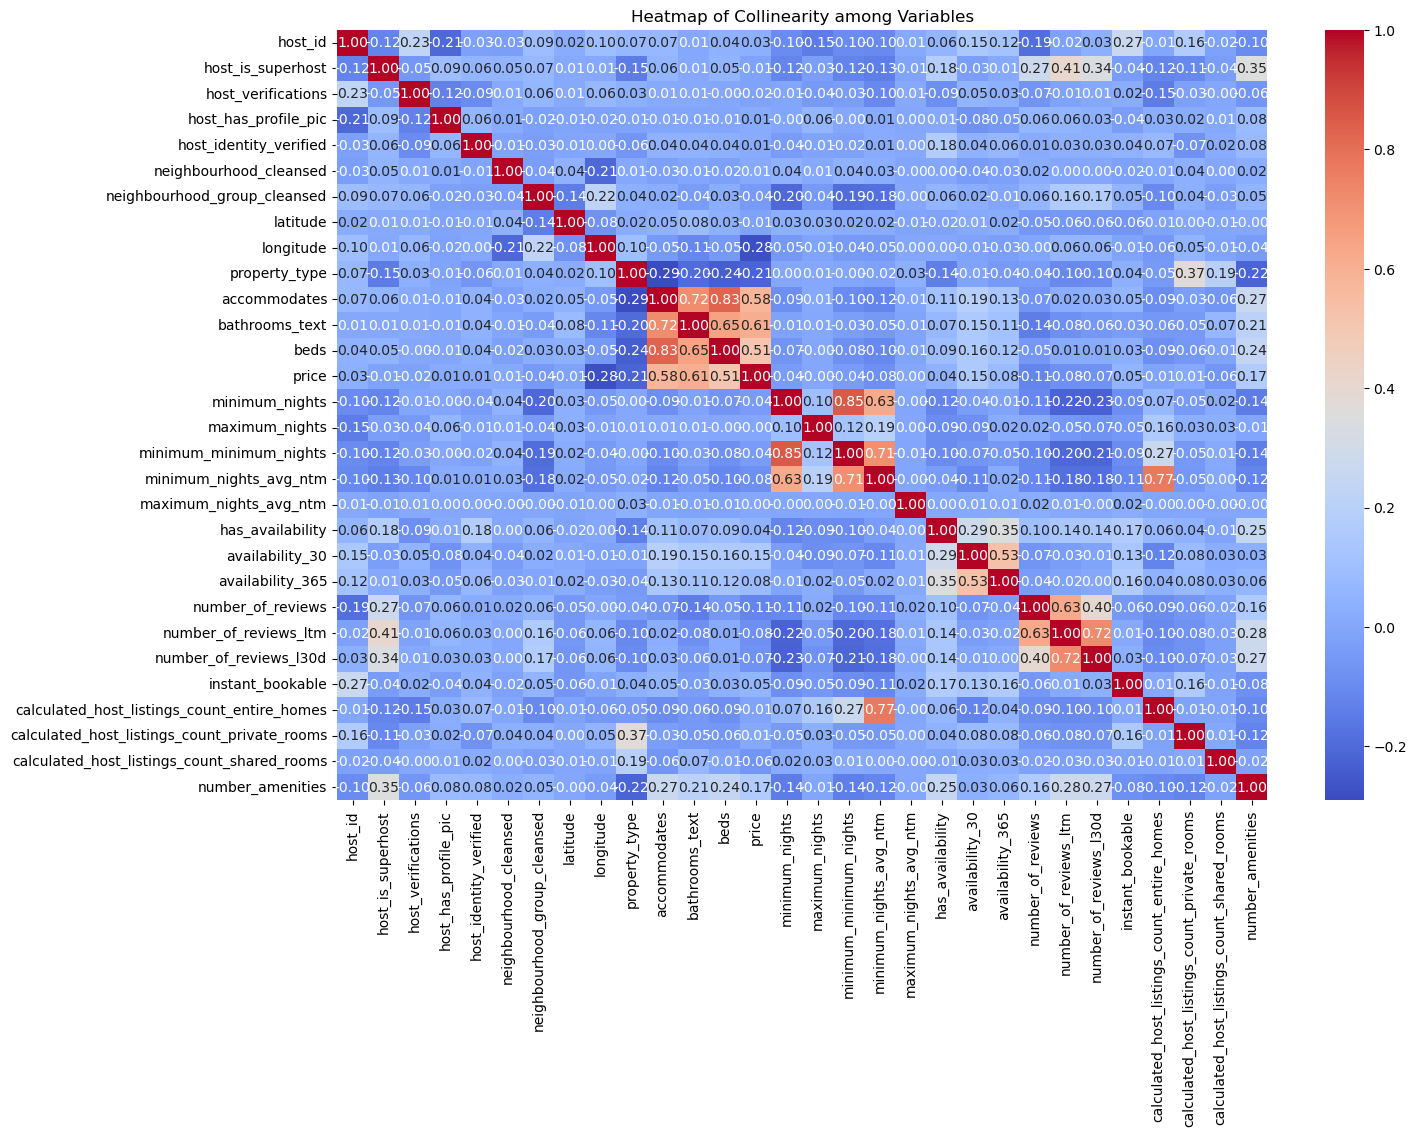

In [19]:
# Selecting columns for checking collinearity, excluding specified columns
cols_for_collinearity = train_df.select_dtypes(include=[np.number])

# Calculating correlation matrix
corr_matrix = cols_for_collinearity.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Collinearity among Variables')
plt.show()


### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
# Preparing the features and target variable

X = train_df.drop('price', axis=1)
y = train_df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the DecisionForestClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Display Decision Forest results
print("Classifier Accuracy:", dt_accuracy)
print("Classification Report:\n", dt_report)


Classifier Accuracy: 0.470785762256548
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       779
         1.0       0.37      0.37      0.37       558
         2.0       0.32      0.28      0.30       536
         3.0       0.35      0.37      0.36       527
         4.0       0.39      0.42      0.40       333
         5.0       0.66      0.63      0.65       245

    accuracy                           0.47      2978
   macro avg       0.47      0.46      0.46      2978
weighted avg       0.47      0.47      0.47      2978



### Random Forest

In [23]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Display results
print("Classifier Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)


Classifier Accuracy: 0.5621222296843519
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       779
         1.0       0.48      0.45      0.46       558
         2.0       0.41      0.30      0.35       536
         3.0       0.43      0.51      0.47       527
         4.0       0.53      0.49      0.51       333
         5.0       0.85      0.69      0.76       245

    accuracy                           0.56      2978
   macro avg       0.57      0.55      0.55      2978
weighted avg       0.56      0.56      0.55      2978

CPU times: user 1.57 s, sys: 10.7 ms, total: 1.58 s
Wall time: 1.6 s


###  Ada Boosting

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize the AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Fit the model on the training data
adaboost_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_ad = adaboost_classifier.predict(X_test)

ad_accuracy = accuracy_score(y_test, y_pred_ad)
ad_report = classification_report(y_test, y_pred_ad)

# Display results
print("Classifier Accuracy:", ad_accuracy)
print("Classification Report:\n", ad_report)


Classifier Accuracy: 0.45936870382807254
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.78      0.69       779
         1.0       0.38      0.36      0.37       558
         2.0       0.33      0.19      0.24       536
         3.0       0.35      0.47      0.40       527
         4.0       0.33      0.19      0.24       333
         5.0       0.56      0.60      0.58       245

    accuracy                           0.46      2978
   macro avg       0.43      0.43      0.42      2978
weighted avg       0.44      0.46      0.44      2978



###  XGBoosting

In [25]:
%%time
from xgboost import XGBClassifier

# Initialize the DecisionForestClassifier
xgboost_classifier = XGBClassifier(random_state=42)

# Fit the model on the training data
xgboost_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_xg = xgboost_classifier.predict(X_test)

xg_accuracy = accuracy_score(y_test, y_pred_xg)
xg_report = classification_report(y_test, y_pred_xg)

# Display results
print("Classifier Accuracy:", xg_accuracy)
print("Classification Report:\n", xg_report)

Classifier Accuracy: 0.5580926796507724
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.84      0.79       779
         1.0       0.45      0.45      0.45       558
         2.0       0.38      0.31      0.34       536
         3.0       0.44      0.48      0.46       527
         4.0       0.49      0.50      0.50       333
         5.0       0.87      0.70      0.77       245

    accuracy                           0.56      2978
   macro avg       0.56      0.55      0.55      2978
weighted avg       0.55      0.56      0.55      2978

CPU times: user 4.12 s, sys: 2.3 s, total: 6.42 s
Wall time: 18.2 s


### Hyperparameter Tuning for Random Forest and XGBoosting

### RF

In [26]:
from sklearn.model_selection import GridSearchCV
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100,150,200],
    'max_depth': [10,15,20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
}

# Grid search with cross-validation for Random Forest
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, n_jobs = -1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_params_rf

/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A Nu

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [27]:
final_model = RandomForestClassifier(**best_params_rf, random_state=42)
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
final_report = classification_report(y_test, final_predictions)
print("Classifier Accuracy:", final_accuracy)
print("Classification Report:\n", final_report)

Classifier Accuracy: 0.568502350570853
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       779
         1.0       0.47      0.46      0.47       558
         2.0       0.42      0.28      0.34       536
         3.0       0.44      0.55      0.49       527
         4.0       0.56      0.51      0.54       333
         5.0       0.85      0.68      0.76       245

    accuracy                           0.57      2978
   macro avg       0.58      0.55      0.56      2978
weighted avg       0.56      0.57      0.56      2978



### Make prediction in test dataset

In [28]:
predictions_rf = final_model.predict(test_df)
predictions_rf

submission_format_file_path = './sample_submission.csv'
submission_format = pd.read_csv(submission_format_file_path)

submission_ensemble1 = submission_format.copy()
submission_ensemble1['price'] = predictions_rf

submission_ensemble1.to_csv('submission_rf1.csv', index=False)

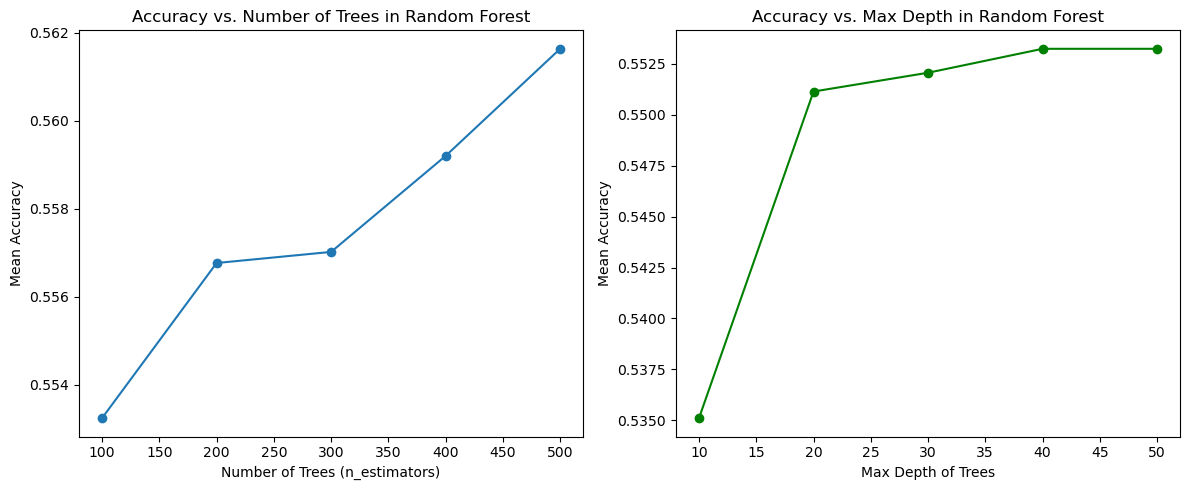

In [29]:
from sklearn.model_selection import cross_val_score
# We will use a smaller range of hyperparameters for demonstration due to time constraints
n_estimators_range = [100, 200, 300, 400,500]
max_depth_range = [10, 20, 30, 40, 50]

# Initialize lists to store mean accuracies for each hyperparameter value
mean_accuracies_estimators = []
mean_accuracies_depth = []

# Loop over n_estimators_range and calculate mean cross-validated accuracy
for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracies_estimators.append(np.mean(scores))

# Loop over max_depth_range and calculate mean cross-validated accuracy
for max_depth in max_depth_range:
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracies_depth.append(np.mean(scores))


# Plotting accuracy vs. n_estimators
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mean_accuracies_estimators, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs. Number of Trees in Random Forest')

# Plotting accuracy vs. max_depth
plt.subplot(1, 2, 2)
plt.plot(max_depth_range, mean_accuracies_depth, marker='o', color='green')
plt.xlabel('Max Depth of Trees')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs. Max Depth in Random Forest')

plt.tight_layout()
plt.show()

### RF Variable Importance Selection

In [30]:
M = 1000
B = int(0.8 * len(train_df))
forests = {}
for K in range(1, 6):
    rf_clf = RandomForestClassifier(n_estimators=M, max_depth=1, max_samples=B,
                                max_features=K, random_state=42, criterion='gini',oob_score=True)
    rf_clf.fit(X, y) 
    forests[K] = rf_clf

In [31]:
best_splits_counts = {k: {col: 0 for col in X_train.columns} for k in range(1, 6)}

for K in range(1, 6):
    for _ in range(M):
        bootstrap_sample = resample(train_df, n_samples=B,random_state=42)
        X_bootstrap = bootstrap_sample.drop('price', axis=1)
        y_bootstrap = bootstrap_sample['price']
        
        selected_features = np.random.choice(X_bootstrap.columns, K, replace=False)
        
        clf = DecisionTreeClassifier(max_depth=1, criterion='gini',random_state=42)
        clf.fit(X_bootstrap[selected_features], y_bootstrap)
        
        best_split_feature = selected_features[clf.tree_.feature[0]]
        best_splits_counts[K][best_split_feature] += 1

best_splits_counts = pd.DataFrame(best_splits_counts).T
best_splits_counts

,host_id,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,...,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,number_amenities
1,39,28,39,40,32,30,27,28,21,43,...,43,31,37,44,34,47,38,29,32,35
2,10,28,11,0,5,9,2,28,59,55,...,27,14,31,29,33,5,57,70,29,51
3,3,9,6,0,0,4,0,27,60,82,...,27,7,35,35,32,0,82,72,18,55
4,0,4,2,0,0,1,0,2,65,85,...,14,4,31,19,22,0,89,72,16,50
5,0,0,1,0,0,0,0,5,49,122,...,9,0,27,18,11,0,84,74,8,45


In [32]:
# Sorting the fifth row
fifth_row_sorted = best_splits_counts.iloc[4].sort_values(ascending=False)

# Creating a new DataFrame with 'x' as the sorted values of the fifth row and 'y' as the original column names
sorted_frequency = pd.DataFrame({'Frequency': fifth_row_sorted.values, 'Variable Name': fifth_row_sorted.index})
sorted_frequency

,Frequency,Variable Name
0,167,accommodates
1,135,bathrooms_text
2,130,beds
3,122,property_type
4,84,calculated_host_listings_count_entire_homes
5,74,calculated_host_listings_count_private_rooms
6,49,longitude
7,47,minimum_nights_avg_ntm
8,45,number_amenities
9,34,minimum_nights


In [33]:
imp_var = list(sorted_frequency['Variable Name'][0:21])
imp_var.append("price")
print(imp_var)

['accommodates', 'bathrooms_text', 'beds', 'property_type', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'longitude', 'minimum_nights_avg_ntm', 'number_amenities', 'minimum_nights', 'minimum_minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_30', 'calculated_host_listings_count_shared_rooms', 'latitude', 'maximum_nights_avg_ntm', 'maximum_nights', 'host_verifications', 'has_availability', 'price']


In [34]:
train_df1 = train_df[imp_var]

In [35]:
# Preparing the features and target variable

X1 = train_df1.drop('price', axis=1)
y1 = train_df1['price']

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1, test_size=0.2,random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [500,600,700],
    'max_depth': [20,30,40],
    
}

# Grid search with cross-validation for Random Forest
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, n_jobs = -1)
grid_search_rf.fit(X_train1, y_train1)

# Best parameters and score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_params_rf

/Users/johnnys/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumP

{'max_depth': 40, 'n_estimators': 600}

In [37]:
final_model = RandomForestClassifier(**best_params_rf, random_state=42)
final_model.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=40, n_estimators=600, random_state=42)

In [38]:
final_predictions = final_model.predict(X_test1)
final_accuracy = accuracy_score(y_test1, final_predictions)
final_report = classification_report(y_test1, final_predictions)
print("Classifier Accuracy:", final_accuracy)
print("Classification Report:\n", final_report)

Classifier Accuracy: 0.5607790463398253
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.85      0.78       779
         1.0       0.46      0.45      0.46       558
         2.0       0.40      0.28      0.33       536
         3.0       0.44      0.55      0.49       527
         4.0       0.54      0.47      0.50       333
         5.0       0.83      0.67      0.74       245

    accuracy                           0.56      2978
   macro avg       0.57      0.54      0.55      2978
weighted avg       0.55      0.56      0.55      2978



### Make prediction in test dataset

In [ ]:
imp_var.remove("price")

In [42]:
test_df1 = test_df[imp_var]

In [43]:
predictions_rf = final_model.predict(test_df1)
predictions_rf

submission_format_file_path = './sample_submission.csv'
submission_format = pd.read_csv(submission_format_file_path)

submission_ensemble2 = submission_format.copy()
submission_ensemble2['price'] = predictions_rf

submission_ensemble2.to_csv('submission_rf2.csv', index=False)

In [44]:
submission_ensemble2.head()

,id,price
0,0,3.0
1,1,2.0
2,2,3.0
3,3,2.0
4,4,3.0


### XGBoosting

In [45]:
X = train_df.drop('price', axis=1)
y = train_df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

random_search = RandomizedSearchCV(xgb, param_distributions=param, n_iter=50,
                                   scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_

# Retrain model with best parameters
xgb_classifier = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)

/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A Nu

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
y_pred_xgb = xgb_classifier.predict(X_test)
print("Detailed classification report:")
print()
print(classification_report(y_test, y_pred_xgb))
print()

Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       779
         1.0       0.45      0.45      0.45       558
         2.0       0.41      0.30      0.35       536
         3.0       0.44      0.48      0.46       527
         4.0       0.52      0.51      0.52       333
         5.0       0.85      0.71      0.78       245

    accuracy                           0.56      2978
   macro avg       0.57      0.55      0.56      2978
weighted avg       0.55      0.56      0.55      2978




In [48]:
predictions_xgb = xgb_classifier.predict(test_df)
predictions_xgb

submission_format_file_path = './sample_submission.csv'
submission_format = pd.read_csv(submission_format_file_path)

submission_ensemble3 = submission_format.copy()
submission_ensemble3['price'] = predictions_xgb

submission_ensemble3.to_csv('submission_xgb1.csv', index=False)

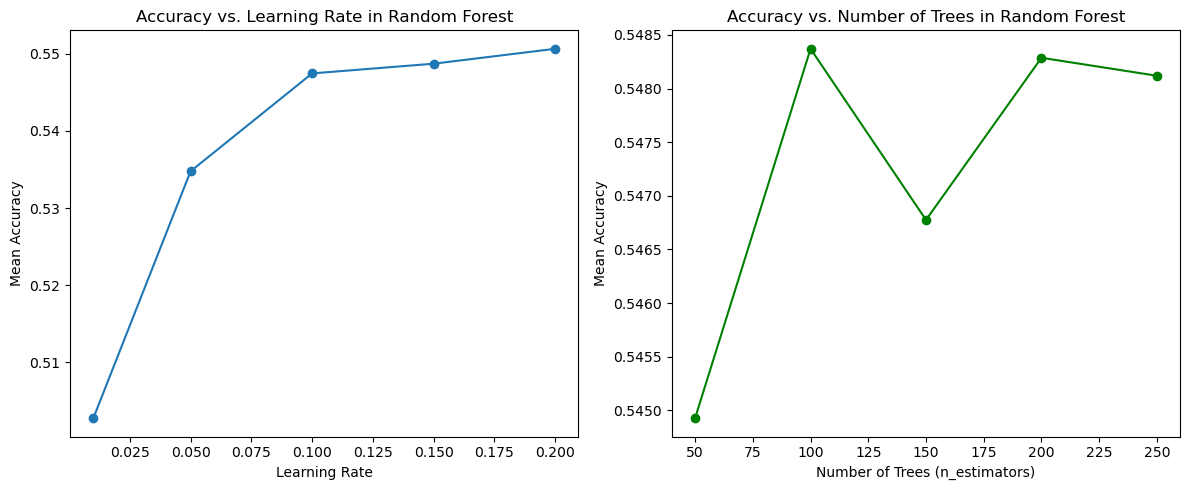

In [49]:
learning_rates_range = [0.01,0.05,0.1,0.15,0.2]
n_estimators_range = [50, 100,150,200,250]

# Initialize lists to store mean accuracies for each hyperparameter value
mean_accuracies_learn = []
mean_accuracies_estimator = []

# Loop over n_estimators_range and calculate mean cross-validated accuracy
for learning_rate in learning_rates_range:
    model = XGBClassifier(learning_rate=learning_rate, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracies_learn.append(np.mean(scores))

# Loop over max_depth_range and calculate mean cross-validated accuracy
for n_estimators in n_estimators_range:
    model = XGBClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracies_estimator.append(np.mean(scores))


# Plotting accuracy vs. n_estimators
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(learning_rates_range, mean_accuracies_learn, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs. Learning Rate in Random Forest')

# Plotting accuracy vs. max_depth
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, mean_accuracies_estimator, marker='o', color='green')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs. Number of Trees in Random Forest')

plt.tight_layout()
plt.show()


### XGBoosting Variable Selection

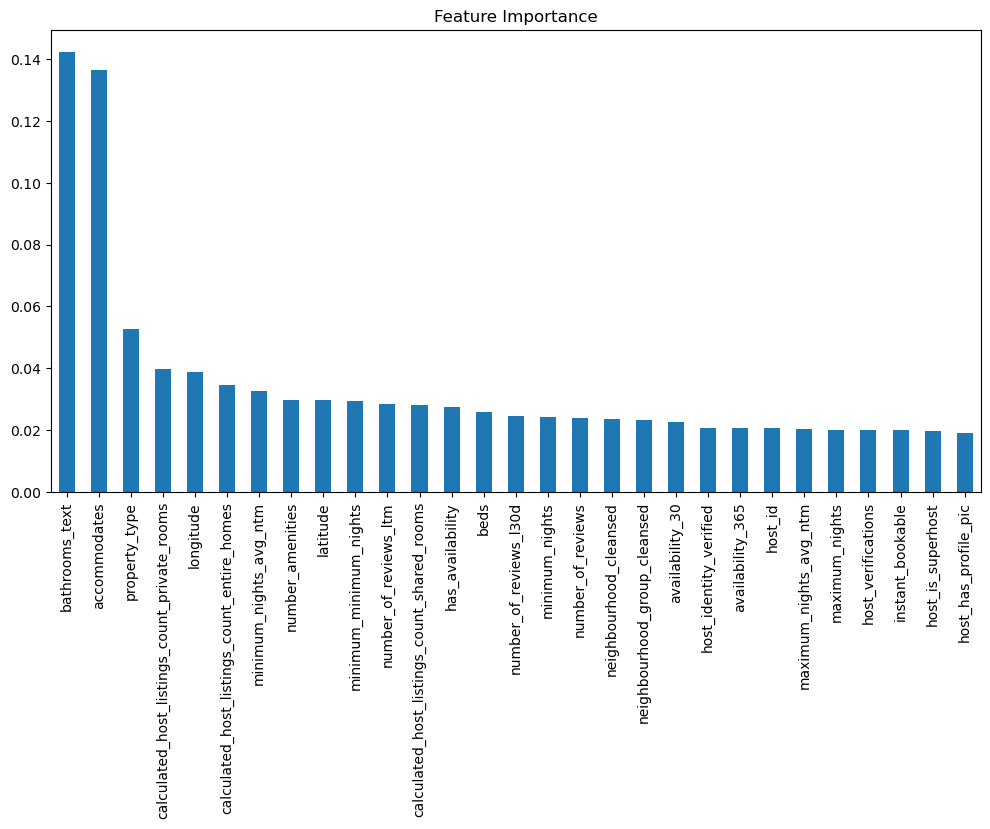

In [50]:

# Feature Importance
importances = xgb_classifier.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotting Feature Importances
plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


In [51]:
imp_var_xgb = list(feature_importances[feature_importances > 0.02].index)
imp_var_xgb.append('price')
# Printing the index labels
print(imp_var_xgb)

['bathrooms_text', 'accommodates', 'property_type', 'calculated_host_listings_count_private_rooms', 'longitude', 'calculated_host_listings_count_entire_homes', 'minimum_nights_avg_ntm', 'number_amenities', 'latitude', 'minimum_minimum_nights', 'number_of_reviews_ltm', 'calculated_host_listings_count_shared_rooms', 'has_availability', 'beds', 'number_of_reviews_l30d', 'minimum_nights', 'number_of_reviews', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'availability_30', 'host_identity_verified', 'availability_365', 'host_id', 'maximum_nights_avg_ntm', 'maximum_nights', 'host_verifications', 'price']


In [52]:
train_df2 = train_df[imp_var_xgb]
X2 = train_df2.drop('price', axis=1)
y2 = train_df2['price']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size=0.2,random_state=42)

In [53]:
param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

random_search2 = RandomizedSearchCV(xgb, param_distributions=param, n_iter=50,
                                   scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
random_search2.fit(X_train2, y_train2)

# Best hyperparameters
best_params2 = random_search2.best_params_

# Retrain model with best parameters
xgb_classifier2 = XGBClassifier(**best_params2, use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier2.fit(X_train2, y_train2)

/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/johnnys/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A Nu

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
best_params2

{'subsample': 0.9,
 'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.2,
 'colsample_bytree': 0.8}

In [55]:
y_pred_xgb2 = xgb_classifier2.predict(X_test2)
print("Detailed classification report:")
print()
print(classification_report(y_test2, y_pred_xgb2))
print()

Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.72      0.84      0.77       779
         1.0       0.45      0.44      0.45       558
         2.0       0.38      0.27      0.31       536
         3.0       0.42      0.49      0.46       527
         4.0       0.53      0.52      0.52       333
         5.0       0.88      0.69      0.78       245

    accuracy                           0.55      2978
   macro avg       0.56      0.54      0.55      2978
weighted avg       0.55      0.55      0.55      2978




In [56]:
imp_var_xgb.remove('price')

In [57]:
test_df2 = test_df[imp_var_xgb]

In [58]:
predictions_xgb = xgb_classifier2.predict(test_df2)
predictions_xgb

submission_format_file_path = './sample_submission.csv'
submission_format = pd.read_csv(submission_format_file_path)

submission_ensemble4 = submission_format.copy()
submission_ensemble4['price'] = predictions_xgb

submission_ensemble4.to_csv('submission_xgb2.csv', index=False)

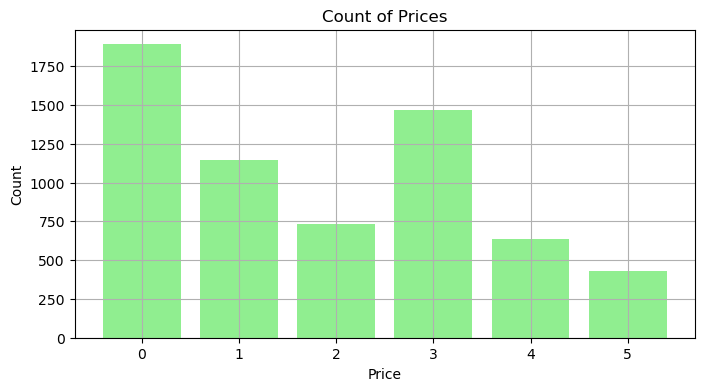

In [59]:
# Count how many times each price appears in the DataFrame to plot the frequency of each price category.

# Calculate the counts of each price
price_counts = submission_ensemble1['price'].value_counts().sort_index()

# Plot bar plot with price on the x-axis and counts on the y-axis
plt.figure(figsize=(8, 4))
plt.bar(price_counts.index, price_counts.values, color='lightgreen')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Count of Prices')
plt.xticks(price_counts.index)
plt.grid(True)
plt.show()


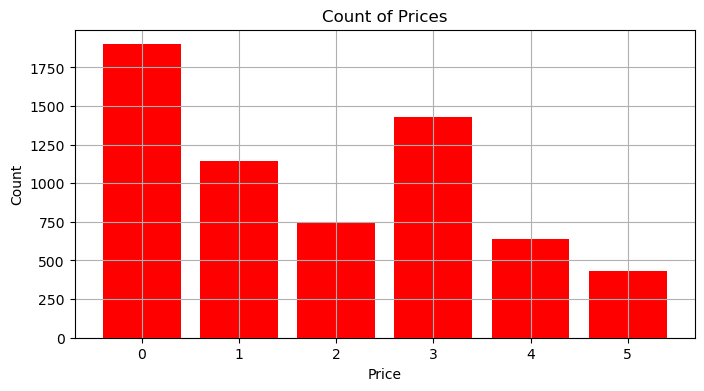

In [60]:
# Count how many times each price appears in the DataFrame to plot the frequency of each price category.

# Calculate the counts of each price
price_counts = submission_ensemble2['price'].value_counts().sort_index()

# Plot bar plot with price on the x-axis and counts on the y-axis
plt.figure(figsize=(8, 4))
plt.bar(price_counts.index, price_counts.values, color='red')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Count of Prices')
plt.xticks(price_counts.index)
plt.grid(True)
plt.show()


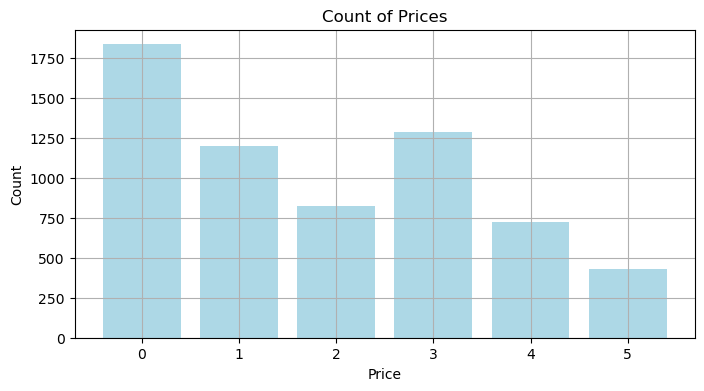

In [61]:
# Count how many times each price appears in the DataFrame to plot the frequency of each price category.

# Calculate the counts of each price
price_counts = submission_ensemble3['price'].value_counts().sort_index()

# Plot bar plot with price on the x-axis and counts on the y-axis
plt.figure(figsize=(8, 4))
plt.bar(price_counts.index, price_counts.values, color='lightblue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Count of Prices')
plt.xticks(price_counts.index)
plt.grid(True)
plt.show()


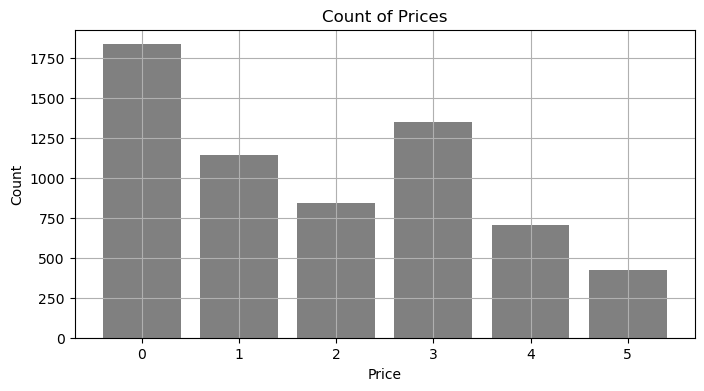

In [62]:
# Count how many times each price appears in the DataFrame to plot the frequency of each price category.

# Calculate the counts of each price
price_counts = submission_ensemble4['price'].value_counts().sort_index()

# Plot bar plot with price on the x-axis and counts on the y-axis
plt.figure(figsize=(8, 4))
plt.bar(price_counts.index, price_counts.values, color='gray')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Count of Prices')
plt.xticks(price_counts.index)
plt.grid(True)
plt.show()


### Try to use all features

In [63]:
# model-new
import pandas as pd

# Load the datasets. Try to use all features
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
sample_submission_df = pd.read_csv('./sample_submission.csv')

# Display the first few rows of each dataset to understand their structure
train_head = train_df.head()
test_head = test_df.head()
sample_submission_head = sample_submission_df.head()

In [64]:
def encode_with_unseen(train_series, test_series):
    """Encodes train and test series, handling unseen categories in test set."""
    unique_values = np.union1d(train_series.unique(), test_series.unique())
    le = LabelEncoder().fit(unique_values)
    return le.transform(train_series), le.transform(test_series)

In [65]:
# Encoding categorical variables
categorical_columns = train_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_df[col], test_df[col] = encode_with_unseen(train_df[col].astype(str), test_df[col].astype(str))

# Splitting the train data into features and target
X = train_df.drop(['price', 'id'], axis=1)
y = train_df['price']

# Handling missing values - imputing with median
X.fillna(X.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_val)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_report = classification_report(y_val, rf_predictions)

# Gradient Boosting Classifier (XGBoost)
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_val)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_val, xgb_predictions)
xgb_report = classification_report(y_val, xgb_predictions)

# Display Random Forest results
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)

# Display XGBoost results (if available)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("Classification Report:\n", xgb_report)

Random Forest Classifier Accuracy: 0.5613467141469731
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.85      0.78       797
         1.0       0.47      0.45      0.46       595
         2.0       0.43      0.33      0.37       529
         3.0       0.44      0.54      0.49       544
         4.0       0.49      0.41      0.45       349
         5.0       0.81      0.66      0.73       275

    accuracy                           0.56      3089
   macro avg       0.56      0.54      0.54      3089
weighted avg       0.56      0.56      0.55      3089

XGBoost Classifier Accuracy: 0.5500161864681127
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.80      0.78       797
         1.0       0.45      0.46      0.46       595
         2.0       0.38      0.32      0.35       529
         3.0       0.44      0.51      0.47       544
         4.0       0.49      0.42   

In [66]:
from sklearn.model_selection import GridSearchCV

# Grid of parameters to search
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 120, 150, 180,200]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=10, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Train the final model with the best parameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model on the validation set
final_predictions = final_model.predict(X_val)
final_accuracy = accuracy_score(y_val, final_predictions)
final_report = classification_report(y_val, final_predictions)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


In [67]:
best_params

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [68]:
print(best_params,final_accuracy)
print(final_report)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.5704111362900615
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.78       797
         1.0       0.48      0.47      0.47       595
         2.0       0.44      0.31      0.37       529
         3.0       0.44      0.56      0.49       544
         4.0       0.52      0.44      0.48       349
         5.0       0.83      0.67      0.74       275

    accuracy                           0.57      3089
   macro avg       0.57      0.55      0.56      3089
weighted avg       0.57      0.57      0.56      3089



In [69]:
# Train the final model with the best parameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X, y)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [70]:
# During prediction
test_features = test_df.drop('id', axis=1)  # Exclude 'id' from the features used for prediction
predictions = final_model.predict(test_features)

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'price': predictions})
submission_df.to_csv('submission_rf_best3.csv', index=False)

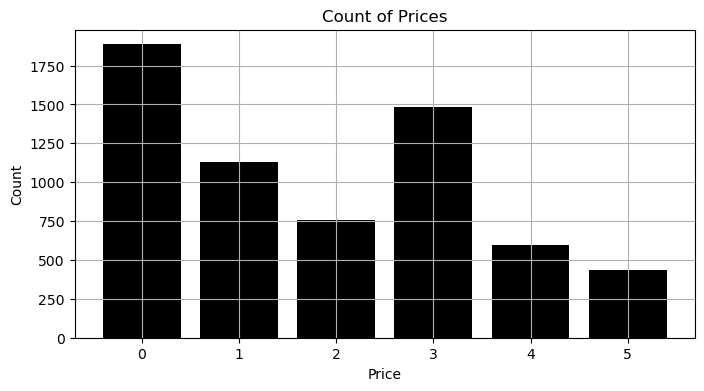

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   4.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=120; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=180; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total tim

In [71]:
# Count how many times each price appears in the DataFrame to plot the frequency of each price category.

# Calculate the counts of each price
price_counts = submission_df['price'].value_counts().sort_index()

# Plot bar plot with price on the x-axis and counts on the y-axis
plt.figure(figsize=(8, 4))
plt.bar(price_counts.index, price_counts.values, color='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Count of Prices')
plt.xticks(price_counts.index)
plt.grid(True)
plt.show()